In [49]:
library(ggplot2)
library(purrr)
library(dplyr)
library(stringr)

library(repr)
options(repr.plot.width=4, repr.plot.height=3)

print(getwd())

df <- read.csv("internal-control-experiments.csv")
df$iteration=factor(df$iteration)
which.nonnum <- function(x) {
  which(is.na(suppressWarnings(as.numeric(as.character(x)))))
}

df_categorical=df[which.nonnum(df$value),]
df=df[!is.na(as.numeric(df$value)), ]
df$value=as.numeric(df$value)
df$time=as.Date(as.POSIXct(df$time, origin="1970-01-01"))

print(summary(df))
print(summary(df_categorical))

[1] "/home/fre/workspace/hnrm/dev/hnrm-experiments/bandits"


Error in as.POSIXlt.character(as.character(x), ...): character string is not in a standard unambiguous format




In [50]:
df_control = df[which(df["name"]=="controlOn"),]
df_pcap110 = df[which(df["name"]=="pcap110"),]
df_pcap110$value=as.numeric(df_pcap110$value)
summary(df_control)

       X                                 time    
 Min.   : 0.000   0 days 00:00:04.999573500: 24  
 1st Qu.: 4.000   0 days 00:00:05.451863250: 24  
 Median : 9.000   0 days 00:00:06.000348250: 24  
 Mean   : 9.861   0 days 00:00:06.450533500: 24  
 3rd Qu.:14.000   0 days 00:00:06.999872250: 24  
 Max.   :37.000   0 days 00:00:07.449562000: 24  
                  (Other)                  :736  
                         variable       value               name     iteration
 6e-05-cumulativeLoss        : 72   Min.   :  1.00   controlOn:880   0:464    
 6e-05-probability           : 72   1st Qu.: 70.75   pcap100  :  0   1:416    
 sensor-RaplKey (PackageID 0): 41   Median :168.50   pcap110  :  0            
 0.0001-cumulativeLoss       : 36   Mean   :303.54   pcap120  :  0            
 0.0001-probability          : 36   3rd Qu.:569.00   pcap150  :  0            
 0.00011-cumulativeLoss      : 36   Max.   :931.00   pcap180  :  0            
 (Other)                     :587              

simpleWarning in if (class(res$value) == "help_files_with_topic") {: the condition has length > 1 and only the first element will be used




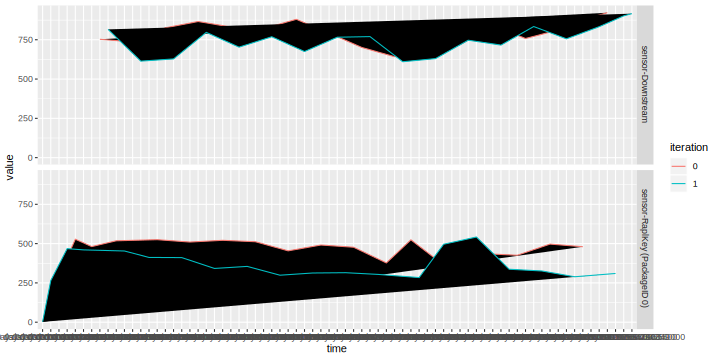

In [51]:
p=ggplot(df_pcap110, aes(x=time, y=value, group=iteration,color=iteration) )+ 
            geom_line() + 
            facet_grid(rows = vars(variable))
print(p)
print(p)